<a href="https://colab.research.google.com/github/GaganReddy19/ML_traning/blob/main/Dat_27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv(r"/content/Wholesale customers data.csv")

In [ ]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
df.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


In [ ]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
df.isnull().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [ ]:
df.shape

(440, 8)

In [ ]:
df['Channel'].unique()

array([2, 1])

In [ ]:
df['Region'].unique()

array([3, 1, 2])

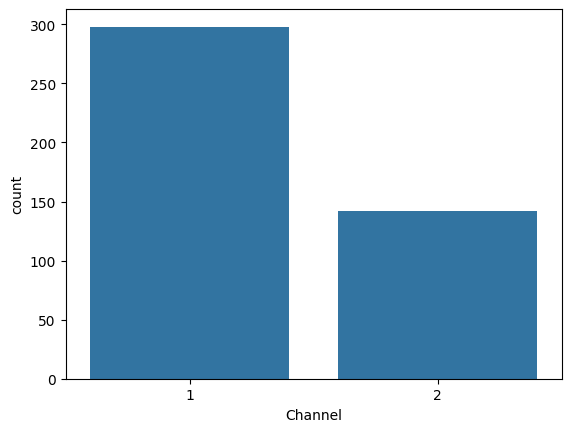

In [ ]:
sns.countplot(x='Channel', data=df)
plt.show()

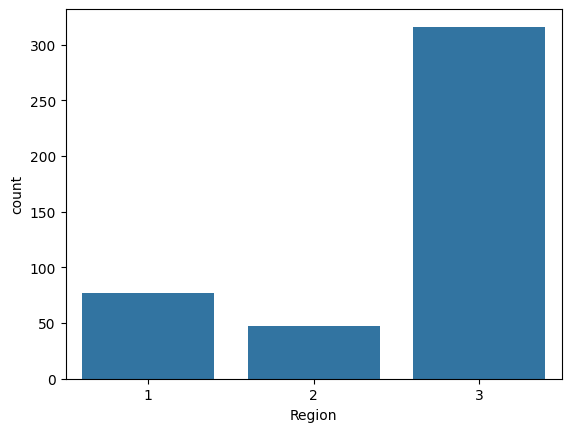

In [ ]:
sns.countplot(x='Region', data=df)
plt.show()

<Axes: ylabel='Density'>

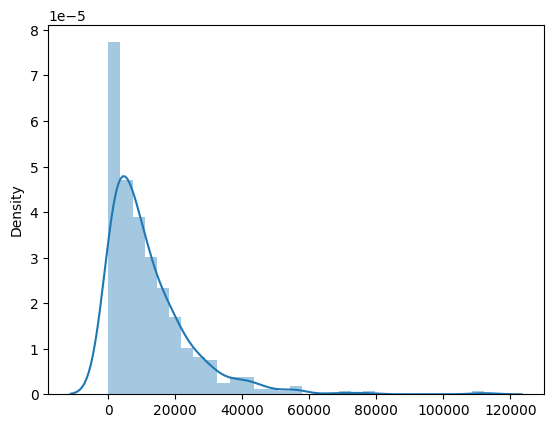

In [ ]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(x=df['Fresh'])


<Axes: ylabel='Density'>

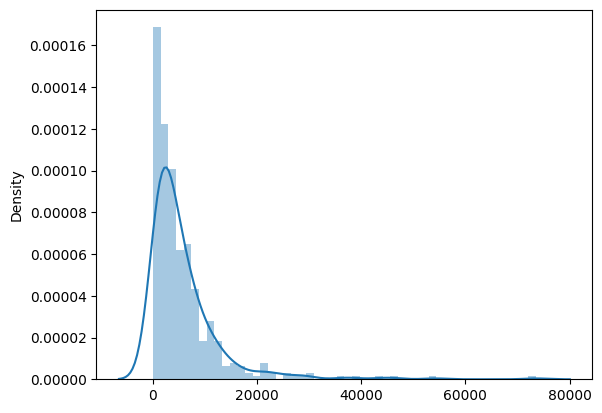

In [ ]:
sns.distplot(x=df['Milk'])

<Axes: ylabel='Density'>

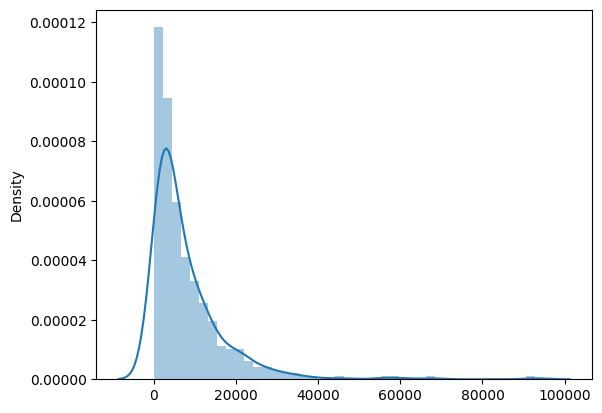

In [ ]:
sns.distplot(x=df['Grocery'])

<Axes: ylabel='Density'>

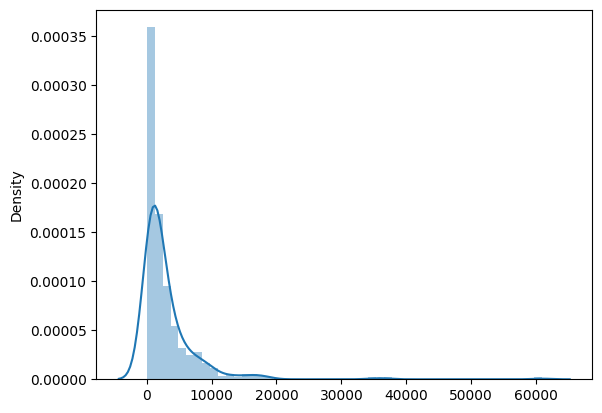

In [ ]:
sns.distplot(x=df['Frozen'])

<Axes: ylabel='Density'>

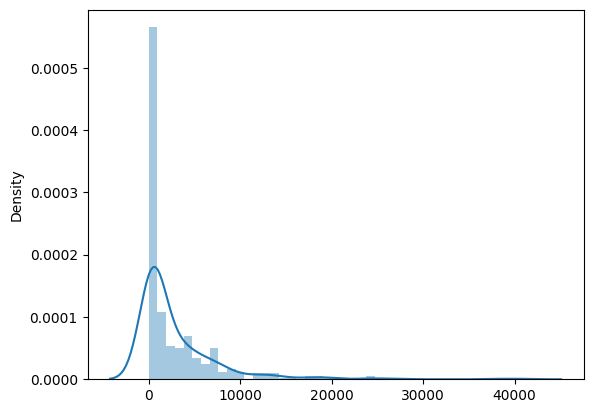

In [ ]:
sns.distplot(x=df['Detergents_Paper'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

In [ ]:
df.drop(['Channel','Region'],axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
stscaler =  StandardScaler()
X=stscaler.fit_transform(df)

In [ ]:
X

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

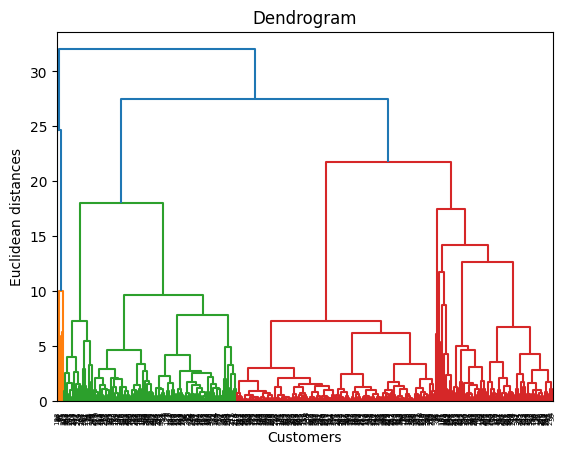

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
len(set(dendrogram['color_list']))

4

In [ ]:
len(set(dendrogram['color_list']))-1

3

In [ ]:
from sklearn.cluster import AgglomerativeClustering


In [ ]:
model = AgglomerativeClustering(n_clusters=3)
Cluster=model.fit_predict(X)

In [ ]:
group_num = pd.Series(Cluster, name='Cluster')

In [ ]:
Cluster

array([2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 0, 0, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 1, 1, 1, 2, 0, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1,

In [ ]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [ ]:
cgp = pd.concat([df, group_num], axis=1)
cgp

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,12669,9656,7561,214,2674,1338,2
1,7057,9810,9568,1762,3293,1776,2
2,6353,8808,7684,2405,3516,7844,2
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,1
436,39228,1431,764,4510,93,2346,1
437,14531,15488,30243,437,14841,1867,2
438,10290,1981,2232,1038,168,2125,1


In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(X,Cluster)

0.2646091480214908

In [ ]:
#Kmeans

In [ ]:
X

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss=[]
for i in range (2,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

In [ ]:
wcss

[2266.9552665832457,
 1644.0598512347563,
 1326.6746082135523,
 1070.2551995135614,
 989.3326418885056,
 856.7070228388113,
 791.8280762163158,
 710.1943394067521,
 668.22250548469]

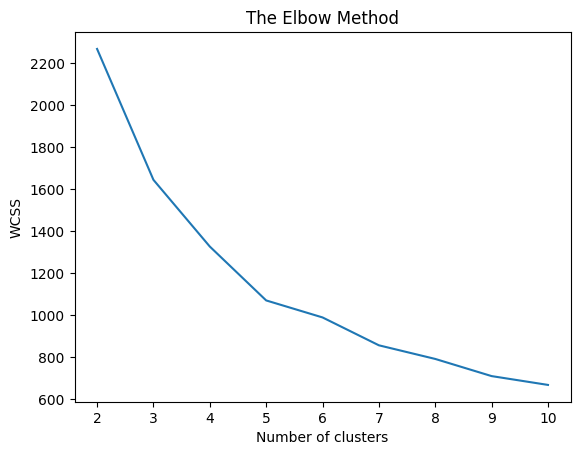

In [ ]:
plt.plot(range(2,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
Kmeans = KMeans(n_clusters = 5, random_state = 204)
groups = model.fit_predict(X)


In [ ]:
groups.shape

(440,)

In [ ]:
group_num=pd.DataFrame(groups,columns=['Group'])
group_num

,Group
0,2
1,2
2,2
3,1
4,1
...,...
435,1
436,1
437,2
438,1


In [ ]:
cust_Kmeans=pd.concat([df,group_num],axis=1)
cust_Kmeans

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
0,12669,9656,7561,214,2674,1338,2
1,7057,9810,9568,1762,3293,1776,2
2,6353,8808,7684,2405,3516,7844,2
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,1
436,39228,1431,764,4510,93,2346,1
437,14531,15488,30243,437,14841,1867,2
438,10290,1981,2232,1038,168,2125,1


In [ ]:
silhouette_score(X,groups)

0.2646091480214908

In [ ]:
type(groups)

numpy.ndarray

In [ ]:
groups

array([2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 0, 0, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 1, 1, 1, 2, 0, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1,

In [ ]:
cust_Kmeans[cust_Kmeans['Group']==1]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,1
8,5963,3648,6192,425,1716,750,1
11,13146,1124,4523,1420,549,497,1
12,31714,12319,11757,287,3881,2931,1
...,...,...,...,...,...,...,...
433,1982,3218,1493,1541,356,1449,1
435,29703,12051,16027,13135,182,2204,1
436,39228,1431,764,4510,93,2346,1
438,10290,1981,2232,1038,168,2125,1


In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=3.2,min_samples=10)
dbscan.fit(X)

DBSCAN(eps=3.2, min_samples=10)

In [ ]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [ ]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
df_cluster=pd.concat([df,cl],axis=1)


In [ ]:
df_cluster

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,0
436,39228,1431,764,4510,93,2346,0
437,14531,15488,30243,437,14841,1867,0
438,10290,1981,2232,1038,168,2125,0


In [ ]:
df_cluster[df_cluster['cluster']==-1]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
23,26373,36423,22019,5154,4337,16523,-1
47,44466,54259,55571,7782,24171,6465,-1
61,35942,38369,59598,3254,26701,2017,-1
85,16117,46197,92780,1026,40827,2944,-1
86,22925,73498,32114,987,20070,903,-1
93,11314,3090,2062,35009,71,2698,-1
181,112151,29627,18148,16745,4948,8550,-1
183,36847,43950,20170,36534,239,47943,-1
325,32717,16784,13626,60869,1272,5609,-1
333,8565,4980,67298,131,38102,1215,-1


In [ ]:
silhouette_score(X,dbscan.labels_)

0.7738898379253679

In [63]:
df_cluster.shape

(440, 7)